In [2]:
import numpy as np
import keras
import keras.layers as lay
import tensorflow as tf
import matplotlib.pyplot as plt

# Dataset loader

In [8]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()
x_train = (x_train.astype('float16')-127.5)/127.5
x_test = (x_test.astype('float16')-127.5)/127.5
train = tf.data.Dataset.from_tensor_slices((x_train,y_train)).shuffle(1000).batch(128).prefetch(tf.data.AUTOTUNE)
test = tf.data.Dataset.from_tensor_slices((x_test,y_test)).shuffle(1000).batch(128).prefetch(tf.data.AUTOTUNE)
!nvidia-smi

Thu Aug  7 18:51:49 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 570.158.01             Driver Version: 576.80         CUDA Version: 12.9     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1060 6GB    On  |   00000000:01:00.0  On |                  N/A |
| 27%   33C    P8              9W /  120W |    5456MiB /   6144MiB |     23%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [12]:
classifier = keras.Sequential([
    lay.InputLayer((28,28,1)),
    lay.Flatten(),
    lay.Dense(256,activation='relu'),
    lay.Dense(256,activation='relu'),
    lay.Dense(256,activation='relu'),
    lay.Dense(256,activation='relu'),
    lay.Dense(10)
])
classifier.summary()
classifier.compile(
    optimizer=keras.optimizers.Adam(1e-4,0.0,.99),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True,name='loss'),
    metrics=[keras.metrics.SparseCategoricalAccuracy(name='acc')]
)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 400,906 (1.53 MB)

 Trainable params: 400,906 (1.53 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
hist = classifier.fit(
    train,
    validation_data=test,
    epochs=20,
)

Epoch 1/20


I0000 00:00:1754603767.875563    1437 service.cc:152] XLA service 0x7267b40048b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1754603767.875630    1437 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce GTX 1060 6GB, Compute Capability 6.1
2025-08-07 18:56:07.925131: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1754603768.117442    1437 cuda_dnn.cc:529] Loaded cuDNN version 90300


 55/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.4064 - loss: 1.9342

I0000 00:00:1754603769.133394    1437 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - acc: 0.7386 - loss: 0.9168 - val_acc: 0.9254 - val_loss: 0.2515
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.9277 - loss: 0.2407 - val_acc: 0.9497 - val_loss: 0.1685
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9480 - loss: 0.1713 - val_acc: 0.9586 - val_loss: 0.1363
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9612 - loss: 0.1340 - val_acc: 0.9640 - val_loss: 0.1180
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9671 - loss: 0.1093 - val_acc: 0.9659 - val_loss: 0.1110
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.9718 - loss: 0.0915 - val_acc: 0.9681 - val_loss: 0.1028
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.9770 - loss: 0.0784 - val_acc: 0.9719 - val_loss: 0.0908
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.9797 - loss: 0.0681 - val_acc: 0.9731 - val_loss: 0.0862
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.9816 -

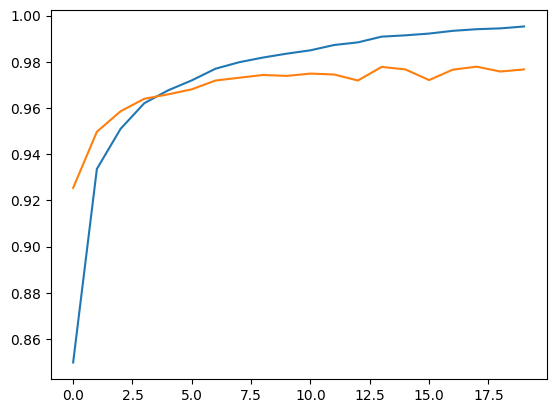

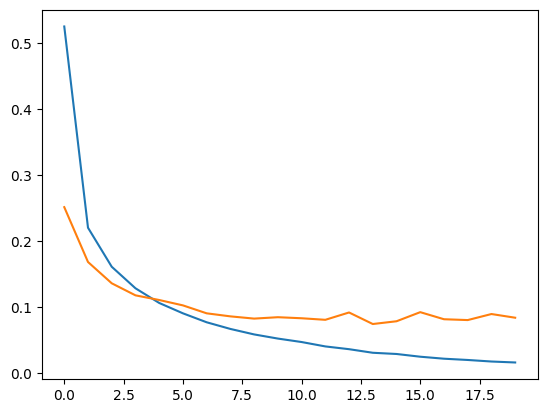

In [14]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.show()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.show()
